In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [59]:
# Load the dataset
data = pd.read_csv("SoilOrganicCarbonRecovery_NorthwestTerritories.csv")

# Drop any rows with missing data
data.dropna(inplace=True)

# Encoding categorical variables
label_encoders = {}
categorical_columns = ['plot', 'burn', 'site', 'stand_dominance', 'moisture', 'nonvascular_functionalgroup', 'ecozone']
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [61]:
# Splitting data into features and target variable
X = data.drop(columns=['date', 'avg_org_carbon'])
y = data['avg_org_carbon']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [62]:
# Initialize the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 70, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 70}


In [63]:
# Train the GBM model with the best hyperparameters
best_gbm = GradientBoostingRegressor(**best_params, random_state=42)
best_gbm.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = best_gbm.predict(X_test)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Evaluate performance using cross-validation (R^2 score)
cv_r2 = cross_val_score(best_gbm, X_train, y_train, cv=5, scoring='r2')
print("Cross-Validation R^2 Score:", cv_r2.mean())

Mean Squared Error: 24.280259151266172
Cross-Validation R^2 Score: 0.704743920683965


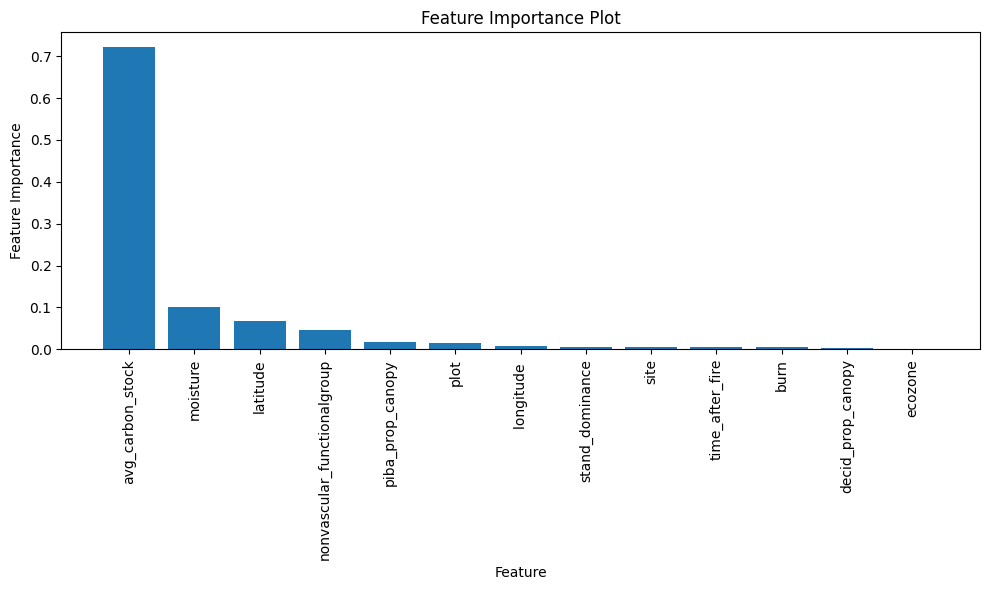

In [65]:
# Feature Importance Plot
# Extract feature importances
feature_importance = best_gbm.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importance[sorted_idx], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Feature Importance")
plt.title("Feature Importance Plot")
plt.tight_layout()
plt.show()

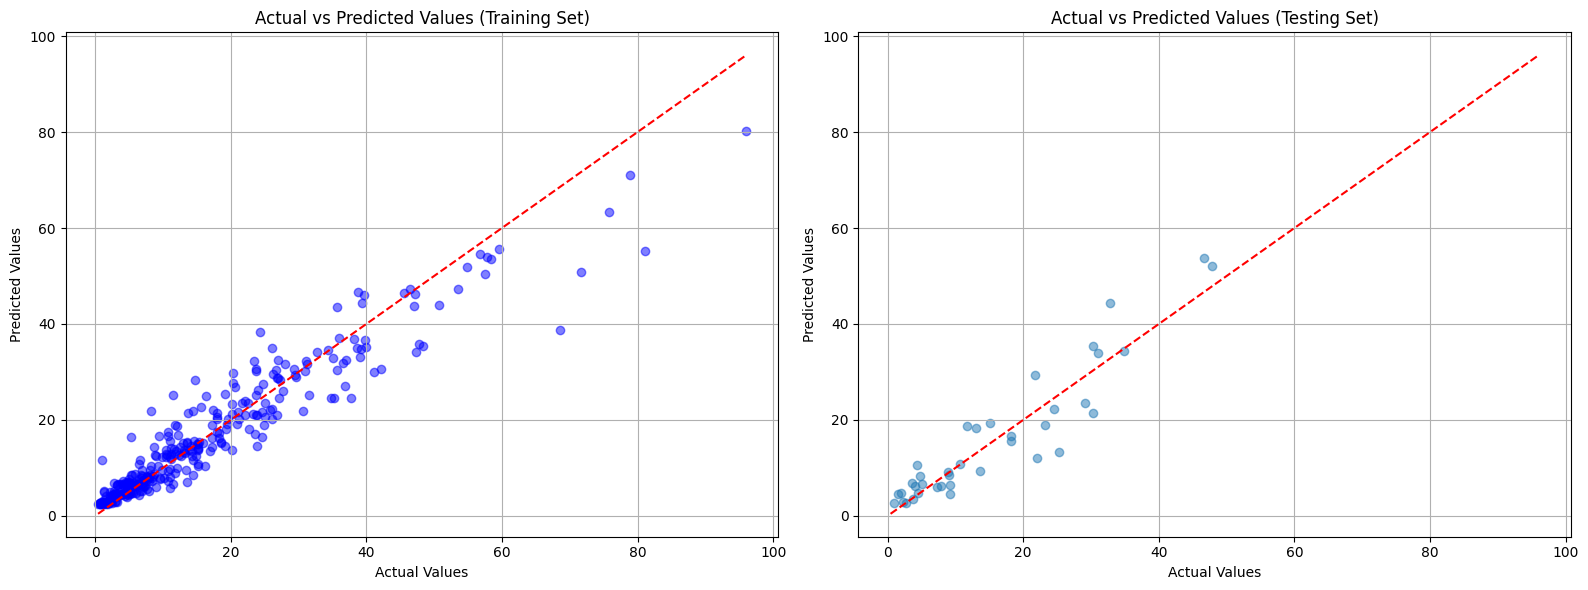

In [66]:
# Predict the values for the training set
y_train_pred = grid_search.predict(X_train)

# Predict the labels for the test set
y_pred_test = best_gbm.predict(X_test)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for training set
axs[0].scatter(y_train, y_train_pred, color='blue', alpha=0.5)
axs[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')  # Diagonal line
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Actual vs Predicted Values (Training Set)')
axs[0].grid(True)

# Plot for testing set
axs[1].scatter(y_test, y_pred_test, alpha=0.5)
axs[1].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red')  # Diagonal line
axs[1].set_xlabel("Actual Values")
axs[1].set_ylabel("Predicted Values")
axs[1].set_title("Actual vs Predicted Values (Testing Set)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [67]:
# Splitting data into features and target variable
X1 = data.drop(columns=['date', 'avg_org_carbon', 'ecozone', 'burn', 'stand_dominance', 'decid_prop_canopy', 'plot', 'site', 'piba_prop_canopy', 'time_after_fire'])
y1 = data['avg_org_carbon']

# Split the dataset into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=42)

# Initialize the Gradient Boosting Regressor
gbm1 = GradientBoostingRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid1 = {
    'n_estimators1': [50, 70, 100],
    'learning_rate1': [0.05, 0.1, 0.2],
    'max_depth1': [3, 4, 5]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search1 = GridSearchCV(estimator=gbm1, param_grid=param_grid1, cv=5, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning
grid_search.fit(X1_train, y1_train)

# Get the best hyperparameters
best_params1 = grid_search.best_params_
print("Best Hyperparameters:", best_params1)

# Train the GBM model with the best hyperparameters
best_gbm1 = GradientBoostingRegressor(**best_params1, random_state=42)
best_gbm1.fit(X1_train, y1_train)

# Predict the target variable for the test set
y1_pred = best_gbm1.predict(X1_test)

# Calculate the mean squared error of the model
mse1 = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error:", mse1)

# Evaluate performance using cross-validation (R^2 score)
cv1_r2 = cross_val_score(best_gbm1, X1_train, y1_train, cv=5, scoring='r2')
print("Cross-Validation R^2 Score:", cv1_r2.mean())

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 70}
Mean Squared Error: 27.18032738053802
Cross-Validation R^2 Score: 0.7114889226388178


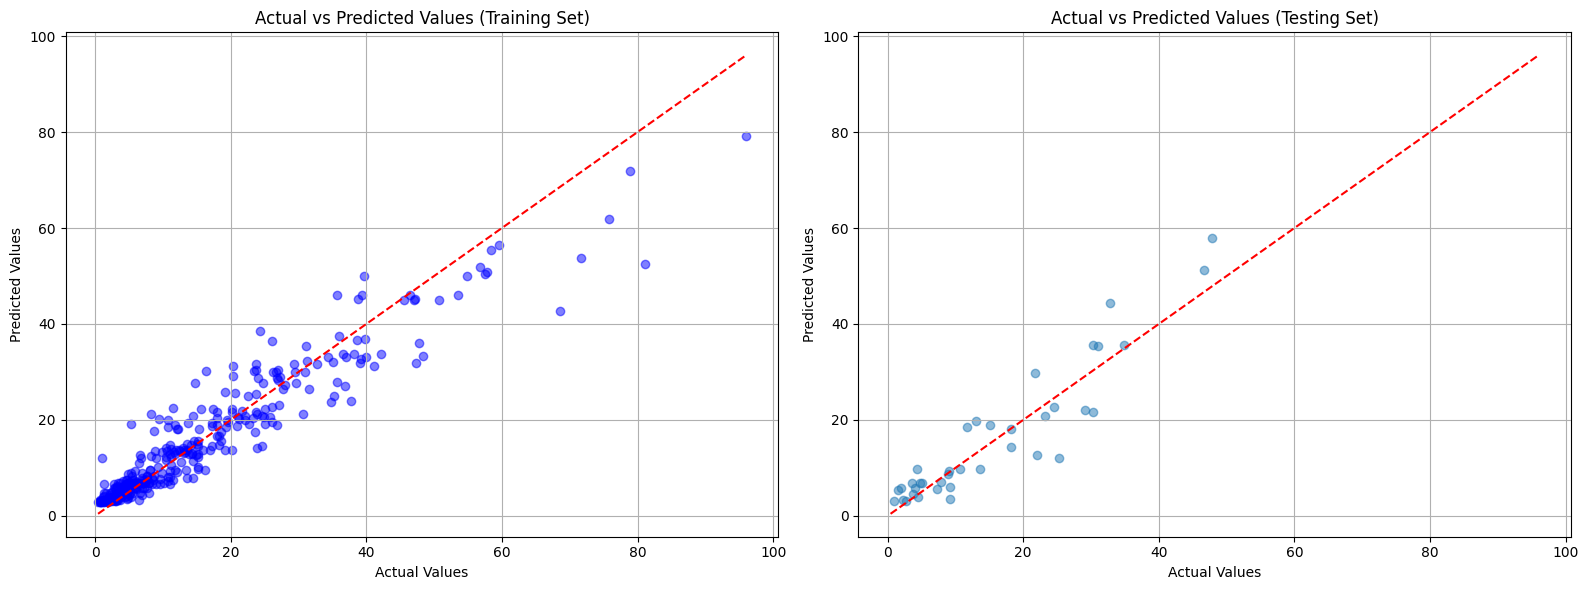

In [68]:
# Predict the values for the training set
y1_train_pred = grid_search.predict(X1_train)

# Predict the labels for the test set
y1_pred_test = best_gbm1.predict(X1_test)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for training set
axs[0].scatter(y1_train, y1_train_pred, color='blue', alpha=0.5)
axs[0].plot([min(y1_train), max(y1_train)], [min(y1_train), max(y1_train)], linestyle='--', color='red')  # Diagonal line
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Actual vs Predicted Values (Training Set)')
axs[0].grid(True)

# Plot for testing set
axs[1].scatter(y1_test, y1_pred_test, alpha=0.5)
axs[1].plot([min(y1_train), max(y1_train)], [min(y1_train), max(y1_train)], linestyle='--', color='red')  # Diagonal line
axs[1].set_xlabel("Actual Values")
axs[1].set_ylabel("Predicted Values")
axs[1].set_title("Actual vs Predicted Values (Testing Set)")
axs[1].grid(True)

plt.tight_layout()
plt.show()


Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 25.816497734881636
R^2 Score: 0.8373503644068745


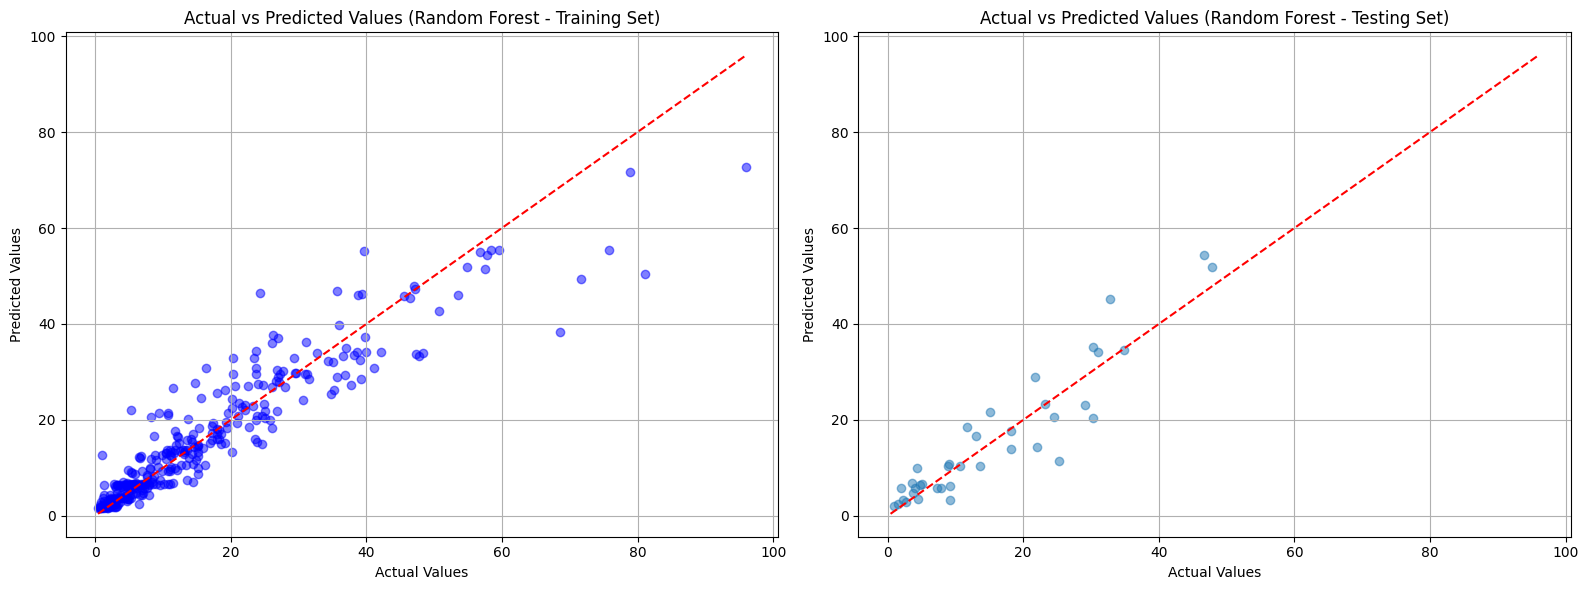

In [69]:
# Define Random Forest regressor
rf = RandomForestRegressor()

# Define hyperparameters grid for Random Forest
param_grid2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search2 = GridSearchCV(estimator=rf, param_grid=param_grid2, cv=5, scoring='neg_mean_squared_error')
grid_search2.fit(X1_train, y1_train)

# Get the best hyperparameters
best_params2 = grid_search2.best_params_

# Train Random Forest model with best hyperparameters
best_rf = RandomForestRegressor(**best_params2, random_state=42)
best_rf.fit(X1_train, y1_train)

# Make predictions on the training set
y1_train_pred = grid_search2.predict(X1_train)

# Make predictions on the testing set
y1_test_pred = best_rf.predict(X1_test)

# Evaluate model performance
mse2 = mean_squared_error(y1_test, y1_test_pred)
r22 = r2_score(y1_test, y1_test_pred)

print("Best Hyperparameters:", best_params2)
print("Mean Squared Error:", mse2)
print("R^2 Score:", r22)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for training set
axs[0].scatter(y1_train, y1_train_pred, color='blue', alpha=0.5)
axs[0].plot([min(y1_train), max(y1_train)], [min(y1_train), max(y1_train)], linestyle='--', color='red')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Actual vs Predicted Values (Random Forest - Training Set)')
axs[0].grid(True)

# Plot for testing set
axs[1].scatter(y1_test, y1_test_pred, alpha=0.5)
axs[1].plot([min(y1_train), max(y1_train)], [min(y1_train), max(y1_train)], linestyle='--', color='red')  # Diagonal line
axs[1].set_xlabel("Actual Values")
axs[1].set_ylabel("Predicted Values")
axs[1].set_title("Actual vs Predicted Values (Random Forest - Testing Set)")
axs[1].grid(True)

plt.tight_layout()
plt.show()